In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
import open3d as o3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
# loading color and depth images
color_img = o3d.io.read_image("output/mono_new/image0.jpg")
depth_img = o3d.io.read_image("output/mono_new/depth_map0.jpg")

In [4]:
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(color_img, depth_img)

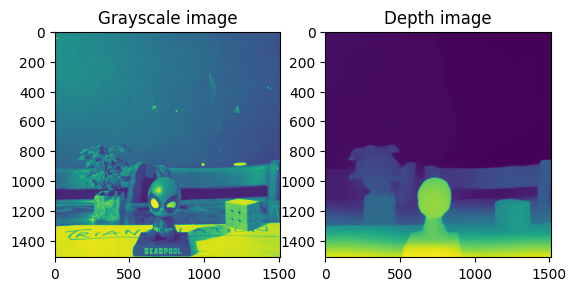

In [5]:
#plotting images

plt.subplot(1, 2, 1)
plt.title('Grayscale image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('Depth image')
plt.imshow(rgbd_image.depth)
plt.show()

In [6]:
#camera intrinsics and extrinsics using open3d for prime sense
camera_intrinsic = o3d.camera.PinholeCameraIntrinsic(
    o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault)

In [7]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_image, camera_intrinsic)

#fliping as point cloud is upside down

pcd.transform([[1, 0, 0, 0],[0, -1, 0, 0],[0, 0, -1, 0],[0, 0, 0, 1]])

PointCloud with 2286144 points.

In [9]:
o3d.visualization.draw_geometries([pcd])

In [10]:
#loading camera instrinsic parameters

cv_file = cv2.FileStorage()
cv_file.open('data/mono_calib_images/cameraMatrix.xml', cv2.FileStorage_READ)
camera_intrinsic = cv_file.getNode('intrinsic').mat()
print(camera_intrinsic)

[[1.26378827e+03 0.00000000e+00 7.60957971e+02]
 [0.00000000e+00 1.20741610e+03 8.42794253e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [12]:
#setting camera intrinsic parameters
camera_intrinsic_o3d = o3d.camera.PinholeCameraIntrinsic(width=1512, height=1512, fx=camera_intrinsic[0][0],fy=camera_intrinsic[1][1], cx=camera_intrinsic[0][2], cy=camera_intrinsic[1][2])  #here height and width are same as image is square
print(camera_intrinsic_o3d.intrinsic_matrix)

[[1.26378827e+03 0.00000000e+00 7.60957971e+02]
 [0.00000000e+00 1.20741610e+03 8.42794253e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [13]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_image, camera_intrinsic_o3d)

#fliping as point cloud is upside down

pcd.transform([[1, 0, 0, 0],[0, -1, 0, 0],[0, 0, -1, 0],[0, 0, 0, 1]])

PointCloud with 2286144 points.

In [16]:
o3d.visualization.draw_geometries([pcd])

In [19]:
#saving this point cloud
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_image, camera_intrinsic_o3d)
o3d.io.write_point_cloud("output/mono_new/point_cloud_03d.ply", pcd)

True